In [10]:
%pylab inline
from soda.profiles import *
from astropy import units as u
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


In [49]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

\begin{equation}
\Phi (\tilde{r}) = v_{halo}^2  Ln(\tilde{r}^2 + d^2)
\end{equation}


\begin{equation}

\end{equation}

In [68]:
def constants(x, y, z, phi, q1, q2):
    a1 = np.cos(phi)
    a2 = np.sin(phi)
    C1 = a1**2/q1**2 + a2**2/q2**2
    C2 = a1**2/q2**2 + a2**2/q1**2
    C3 = 2*a1*a2*(1/q1**2 - 1/q2**2)
    return C1, C2, C3

def VeraCiro13_pot(x, y, z, v_halo, phi, q1, q2, q3, qz, d, r_a):
    """
    VeraCiro potential: see \S2.1 of 
    http://adsabs.harvard.edu/abs/2013ApJ...773L...4V
    """
    phi = phi * np.pi/180.
    C1, C2, C3 = constants(x, y, z, phi, q1, q2)
    r_A = (x**2 + y**2 +z**2/qz**2)**0.5
    r_T = (C1*x**2 + C2*y**2 + C3*x*y + z**2/q3**2)**0.5
    r_til = r_A*(r_a + r_T)/(r_a + r_A)
    pot = (v_halo*u.km/u.s)**2 * np.log(r_til**2 + d**2)
    return pot.value


def VeraCiro13_acc(x, y, z, v_halo, phi, q1, q2, q3, qz, d, r_a):
    """
    Cartessian acceleration of the VeraCiro13 potential.
    """
    C1, C2, C3 = constants(x, y, z, phi, q1, q2)
    r_A = (x**2 + y**2 +z**2/qz**2)**0.5
    r_T = (C1*x**2 + C2*y**2 + C3*x*y + z**2/q3**2)**0.5
    r_til = r_A*(r_a + r_T)/(r_a + r_A)
    
    dr_dx = (((r_a*x/r_A + r_A*(2*C1*x + C3*y)/(2*r_T)) + r_T*x/r_A)*(r_a + r_A)
             - x*(r_a+r_T)/r_A)/ (r_a + r_A)**2.0
    
    dr_dy = (((r_a*y/r_A + r_A*(2*C2*y + C3*x)/(2*r_T)) + r_T*y/r_A)*(r_a + r_A)
             - y*(r_a+r_T)/r_A) / (r_a + r_A)**2.0
    
    dr_dz = (((r_a*z/(q_z**2*r_A) + r_A*z/(r_T*q_3**2)) + r_T*z/(r_A*q_z**2))*(r_a + r_A)
             - z*(r_a+r_T)/(r_A*q_z**2)) / (r_a + r_A)**2.0
        
    ax = -2*v_halo**2 * r_til / (r_til**2 + d**2)  * dr_dx
    ay = -2*v_halo**2 * r_til / (r_til**2 + d**2)  * dr_dy
    az = -2*v_halo**2 * r_til / (r_til**2 + d**2)  * dr_dz
    
    return ax, ay, az

In [ ]:
def cube_3dgrid(size, n_points):
    3d_grid = np.zeros([n_points, n_points])


In [45]:
n_points = 100
pot_grid = np.zeros([n_points, n_points, n_points])

x = np.linspace(-40, 40, n_points)
y = np.linspace(-40, 40, n_points)
z = np.linspace(-40, 40, n_points)

for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            pot_grid[i][j][k] = VeraCiro13_pot(x[i], y[j], z[k], 200, 97, 1.38, 1, 1.36, 0.9, 12, 30 )

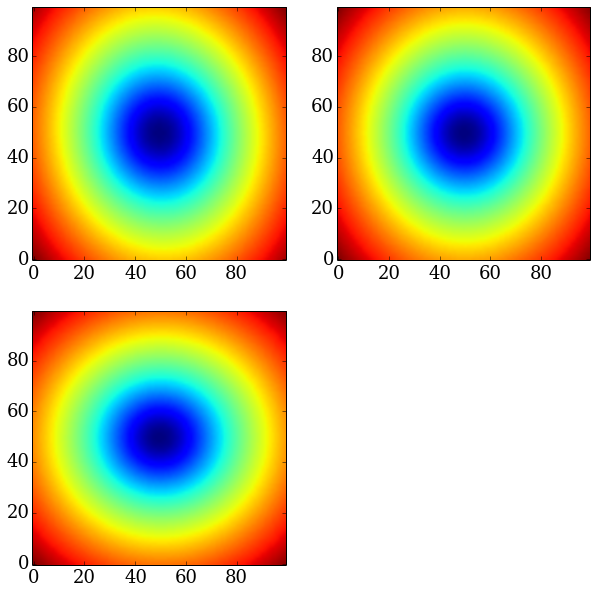

In [64]:
figure(figsize=(10, 10))
subplot(2, 2, 1)
imshow(pot_grid[:,:,39].T, origin='lower')

subplot(2, 2, 2)
imshow(pot_grid[:,39,:].T, origin='lower')

subplot(2, 2, 3)
imshow(pot_grid[39,:,:].T, origin='lower')